## Import packages for data manipulation and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [35]:
import warnings
warnings.filterwarnings(action='ignore')

C:\Users\aaron\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Getting the data

Data from the UCI machine learning repository 

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                 skipinitialspace=True,
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# set column names 
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', \
              'marital-status', 'occupation', 'relationship', 'race', 'sex', \
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'over-50k']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Check data types and null values

In [4]:
df.info()
# we see that there are no nulls in the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  over-50k        32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# can see that capital gain and loss are super heavily skewed 
# hours per week also has a 99 max possibly indicating a dummy value 
# age at 90 might also be a dummy value but might also be possible 

# EDA

In [4]:
# find our categorical and numerical columns 
cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
con = ['age', 'fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']

label = 'over-50k'

## Continuous columns

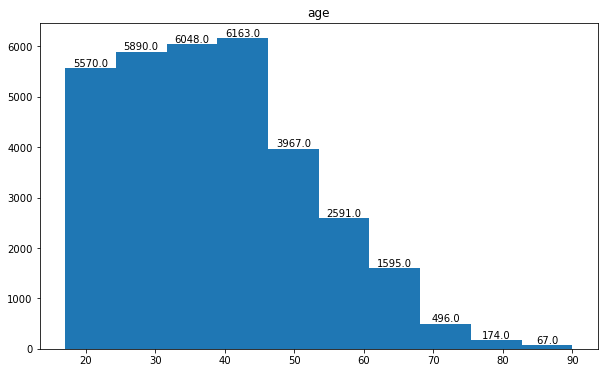

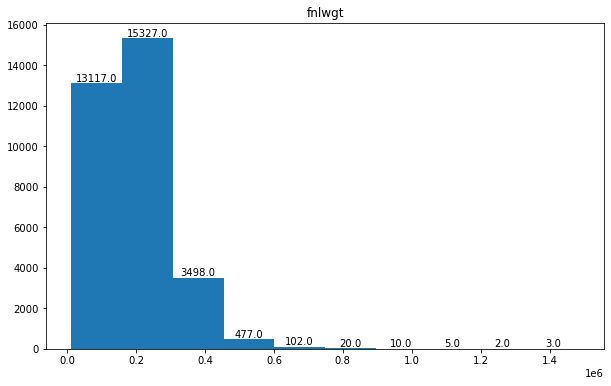

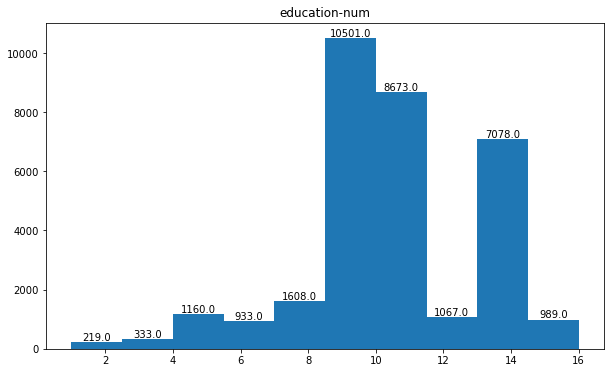

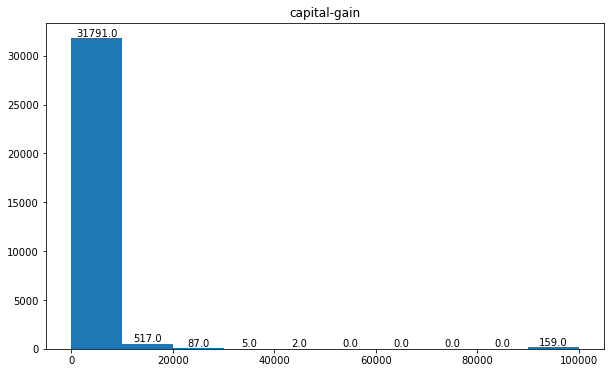

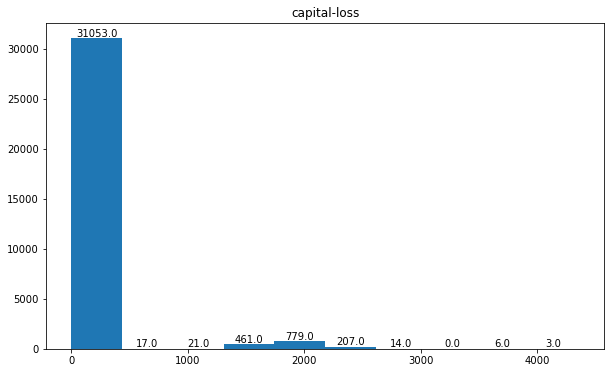

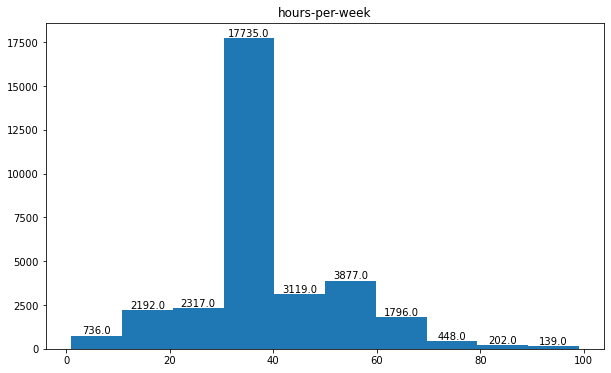

In [8]:
for column in con:
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    n, bins, patches = ax.hist(df[column])
    
    ax.set_title(column)
    
    for num, rect in zip(n, patches):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, num,
                ha='center', va='bottom')

    plt.show()

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
fnlwgt               -0.018768  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  


<AxesSubplot:>

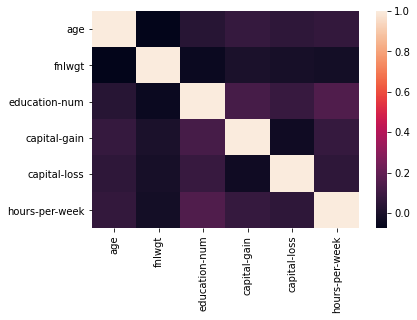

In [17]:
print(df[con].corr())
sns.heatmap(df[con].corr())

In [18]:
pd.pivot_table(df, index='over-50k', values=con)

,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week
over-50k,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,190340.86517,38.840210
>50K,44.249841,4006.142456,195.001530,11.611657,188005.00000,45.473026


In [ ]:
# looks like there is no high correlation between the columns

## Categorical columns

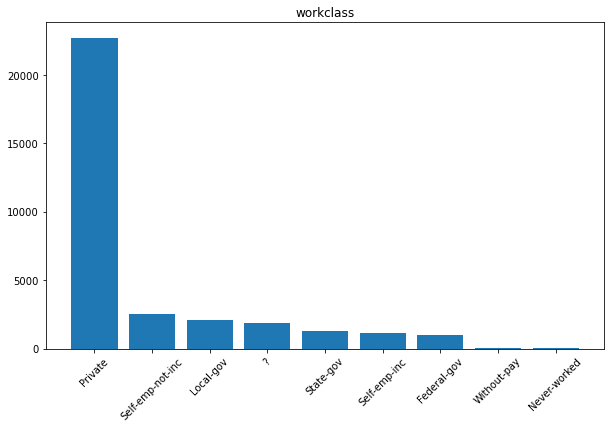

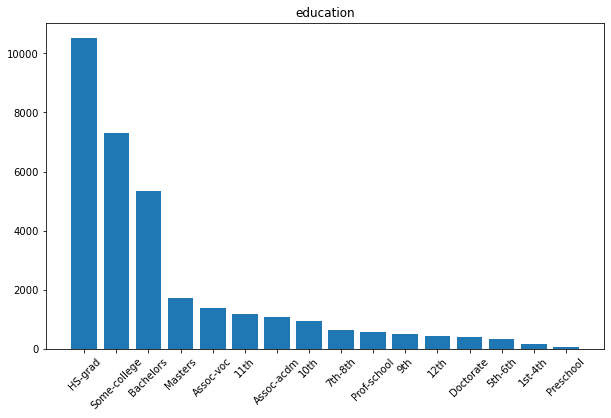

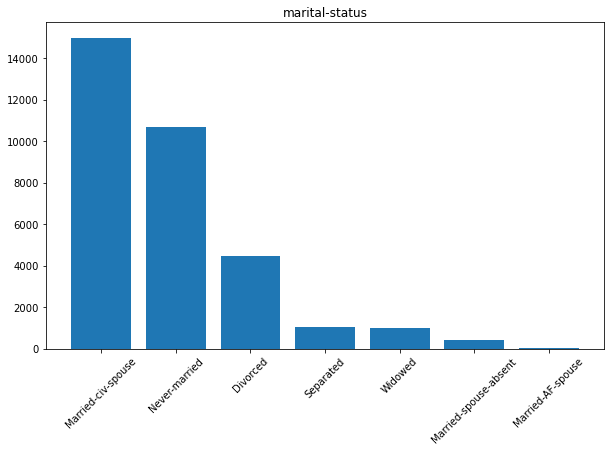

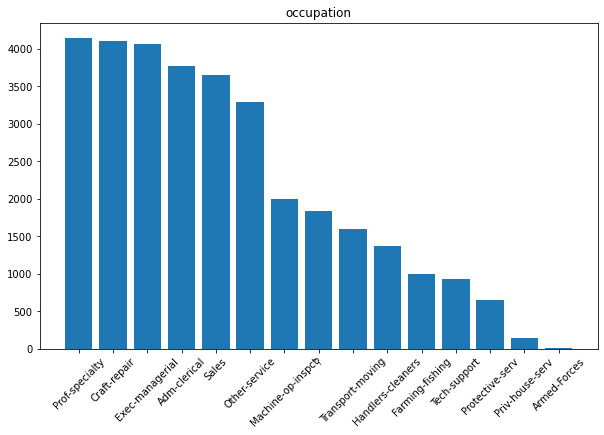

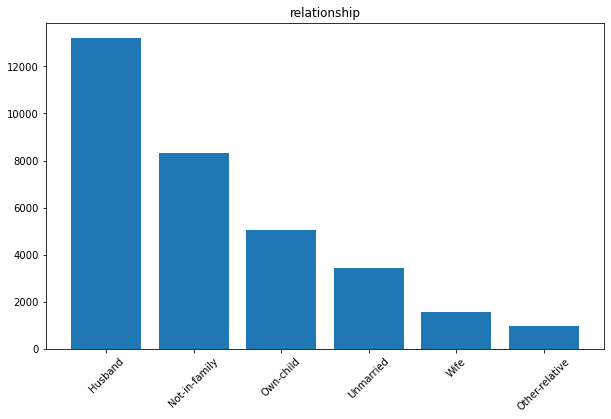

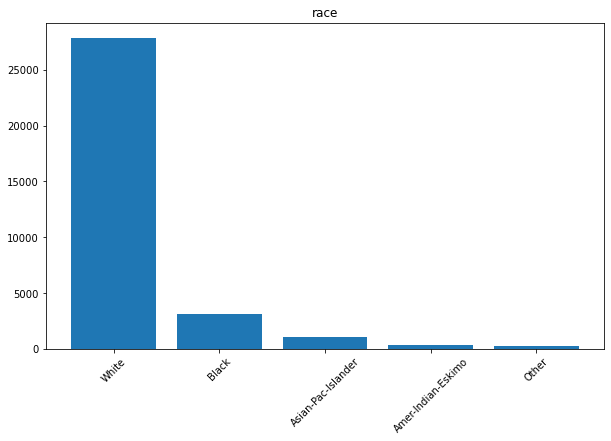

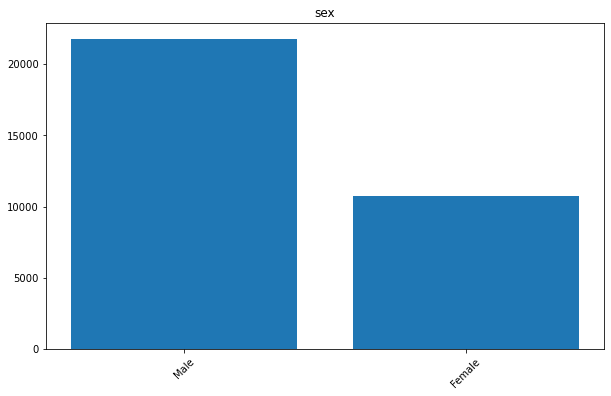

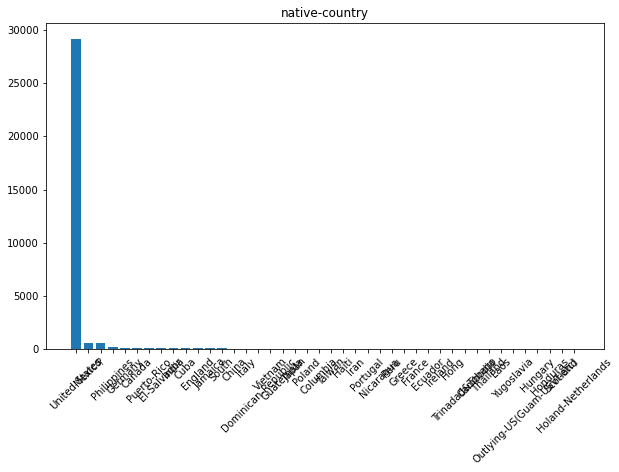

In [10]:
for column in cat:
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    dist = df[column].value_counts()
    ax.bar(dist.index, dist.values)
    
    ax.set_title(column)
    plt.xticks(rotation = 45)
    
    plt.show()

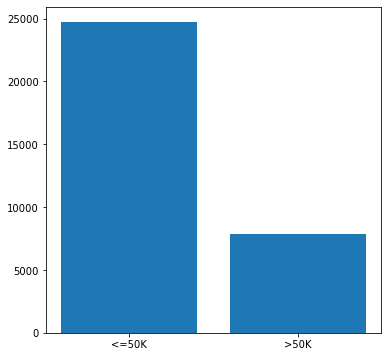

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
dist = df[label].value_counts()
ax.bar(dist.index, dist.values)
plt.show()

# Feature engineering

Possible things to look at:

1. Split education and higher education (>high school grad) 

2. Split gov and non gov employees 

In [22]:
df[['education', 'education-num']].value_counts()

education     education-num
HS-grad       9                10501
Some-college  10                7291
Bachelors     13                5355
Masters       14                1723
Assoc-voc     11                1382
11th          7                 1175
Assoc-acdm    12                1067
10th          6                  933
7th-8th       4                  646
Prof-school   15                 576
9th           5                  514
12th          8                  433
Doctorate     16                 413
5th-6th       3                  333
1st-4th       2                  168
Preschool     1                   51
dtype: int64

In [5]:
df['high-edu'] = df['education-num'].apply(lambda x: 1 if x > 9 else 0)
df['high-edu'].value_counts()

1    17807
0    14754
Name: high-edu, dtype: int64

In [29]:
pd.pivot_table(df, index='over-50k', columns=['high-edu'], values='workclass', aggfunc='count')

high-edu,0,1
over-50k,,
<=50K,12835,11885
>50K,1919,5922


In [6]:
df['gov-emp'] = df['workclass'].apply(lambda x: 1 if 'gov' in x else 0)
df['gov-emp'].value_counts()

0    28210
1     4351
Name: gov-emp, dtype: int64

In [30]:
pd.pivot_table(df, index='over-50k', columns=['gov-emp'], values='workclass', aggfunc='count')

gov-emp,0,1
over-50k,,
<=50K,21710,3010
>50K,6500,1341


## Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder

In [8]:
# change label to be 0: under 50k and 1: over 50k
df['over-50k'] = df['over-50k'].map({"<=50K": 0, ">50K": 1})
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over-50k,high-edu,gov-emp
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1,0


In [9]:
X = df.drop([label, 'education'], axis=1)
y = df[label]

(array([   18.,   779.,  1612.,  1924.,  5862., 12433.,  7590.,  2154.,
          172.,    17.]),
 array([ 9.41613428,  9.89559352, 10.37505276, 10.854512  , 11.33397123,
        11.81343047, 12.29288971, 12.77234895, 13.25180818, 13.73126742,
        14.21072666]),
 <BarContainer object of 10 artists>)

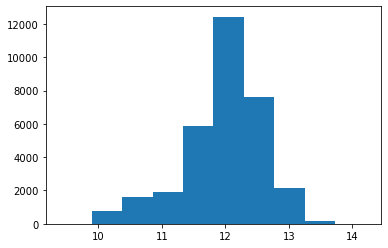

In [17]:
# try to log some skewed fields to see if they can be normalized
plt.hist(np.log(X['fnlwgt']))

In [10]:
# create a column transformer 
ct = make_column_transformer(
        (StandardScaler(), ['age', 'fnlwgt', 'hours-per-week']),   # use min max scaling for the continuous columns 
        (MinMaxScaler(), ['capital-gain', 'capital-loss']),   # use min max scaling for the continuous columns 
        (OneHotEncoder(), ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'high-edu', 'gov-emp']), # use one hot encoding for the categorical variables 
        (OrdinalEncoder(), ['education-num'])
     )
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'fnlwgt', 'hours-per-week']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['capital-gain', 'capital-loss']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['workclass', 'marital-status', 'occupation',
                                  'relationship', 'race', 'sex',
                                  'native-country', 'high-edu', 'gov-emp']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['education-num'])])

In [11]:
X = ct.fit_transform(X)
X

<32561x96 sparse matrix of type '<class 'numpy.float64'>'
	with 427473 stored elements in Compressed Sparse Row format>

# Modeling

In [23]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
names_list = [
    "LogisticRegression", 
    "KNN",
    "SVC",
    #"Naive Bayes",
    "Decision Tree",
    "Random Forest",
    "GradientBoosting"
]
clf_list = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    #GaussianNB(),
    DecisionTreeClassifier(random_state=1),
    RandomForestClassifier(random_state=1),
    GradientBoostingClassifier(random_state=1)
]

In [27]:
for name, clf in zip(names_list, clf_list):
    cv = cross_val_score(clf, X_train, y_train, cv=5)
    print(name + ": " + str(cv.mean()))

LogisticRegression: 0.8488560438544097
KNN: 0.8125000248720562
SVC: 0.849816002054616
Decision Tree: 0.8148037152588039
Random Forest: 0.8545766610204029
GradientBoosting: 0.8636748960624402


In [21]:
cross_val_score(GaussianNB(), X_train.toarray(), y_train, cv=5).mean()

0.5196552696149327

## Scores

| Model | Baseline | 
| --- | --- | 
| Naive Bayes | 0.519 |
| Logistic Regression | 0.848 |
| KNN | 0.812 |
| SVC | 0.849 |
| Decision Tree | 0.814 |
| Random Forest | 0.854 |
| Gradient Boosting | 0.863 |

# Tuning

In [28]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [31]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5)
best_clf_lr = clf_lr.fit(X_train, y_train)

print('Logistic Regression')
print('Best Score: ' + str(best_clf_lr.best_score_))
print('Best Parameters: ' + str(best_clf_lr.best_params_))

Logistic Regression
Best Score: 0.8510827672023431
Best Parameters: {'C': 29.763514416313132, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [36]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5)
best_clf_knn = clf_knn.fit(X_train, y_train)

print('KNN')
print('Best Score: ' + str(best_clf_knn.best_score_))
print('Best Parameters: ' + str(best_clf_knn.best_params_))

KNN
Best Score: 0.8270501630685706
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [39]:
svc = SVC()
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]

clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, n_jobs=-1)
best_clf_svc = clf_svc.fit(X_train, y_train)

print('SVC')
print('Best Score: ' + str(best_clf_svc.best_score_))
print('Best Parameters: ' + str(best_clf_svc.best_params_))

KeyboardInterrupt: 

In [ ]:
# should use randomized grid search to figure out better params and then use grid search to be more specific 
# but this honestly is too much time for it to run so yeah

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)

print('Random Forest')
print('Best Score: ' + str(best_clf_rf.best_score_))
print('Best Parameters: ' + str(best_clf_rf.best_params_))

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)

print('Random Forest')
print('Best Score: ' + str(best_clf_rf.best_score_))
print('Best Parameters: ' + str(best_clf_rf.best_params_))

## Scores

| Model | Baseline | Tuned
| --- | --- | --- |
| Naive Bayes | 0.519 | x |
| Logistic Regression | 0.848 | 0.851 |
| KNN | 0.812 | 0.827 |
| SVC | 0.849 | --- |
| Decision Tree | 0.814 | x |
| Random Forest | 0.854 | --- |
| Gradient Boosting | 0.863 | --- |